In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
City_data = pd.read_csv(city_data_to_load)
Ride_data = pd.read_csv(ride_data_to_load)

# group ride data by city
Ride_data_agg = pd.DataFrame({'Number of Rides' : Ride_data[["city"]].copy().groupby("city").size()})
Ride_data_agg.head()

# Display the data table for preview
# City_data_merged.head()



,Number of Rides
city,
Amandaburgh,18
Barajasview,22
Barronchester,16
Bethanyland,18
Bradshawfurt,10


In [2]:
#get average fair and total fare
Ride_data.head()
Ride_data_agg['Average fare'] = Ride_data[['city','fare']].copy().groupby('city')['fare'].mean()
Ride_data_agg['Total fare'] = Ride_data[['city','fare']].copy().groupby('city')['fare'].sum()
Ride_data_agg.head()

,Number of Rides,Average fare,Total fare
city,,,
Amandaburgh,18,24.641667,443.55
Barajasview,22,25.332273,557.31
Barronchester,16,36.422500,582.76
Bethanyland,18,32.956111,593.21
Bradshawfurt,10,40.064000,400.64


In [3]:
# Combine the data into a single dataset
City_data_merged = pd.merge(Ride_data_agg,City_data, how='outer',on='city')
City_data_merged = City_data_merged.sort_values(by=['type'],ascending=False)
City_data_merged.head()


,city,Number of Rides,Average fare,Total fare,driver_count,type
0,Amandaburgh,18,24.641667,443.55,12,Urban
83,Rodneyfort,23,28.616957,658.19,34,Urban
81,Roberthaven,24,23.729167,569.50,47,Urban
80,Richardfort,28,22.373214,626.45,38,Urban
79,Reynoldsfurt,19,21.919474,416.47,67,Urban


## Bubble Plot of Ride Sharing Data

In [4]:
# Obtain the x and y coordinates for each of the three city types
x_axis_urban = City_data_merged.loc[City_data_merged['type'] == 'Urban']['Number of Rides'].copy()
y_axis_urban = City_data_merged.loc[City_data_merged['type'] == 'Urban']['Average fare'].copy()
s_urban = City_data_merged.loc[City_data_merged['type'] == 'Urban']['driver_count'].copy()*10
x_axis_rural = City_data_merged.loc[City_data_merged['type'] == 'Rural']['Number of Rides'].copy()
y_axis_rural = City_data_merged.loc[City_data_merged['type'] == 'Rural']['Average fare'].copy()
s_rural = City_data_merged.loc[City_data_merged['type'] == 'Rural']['driver_count'].copy()*10
x_axis_suburban = City_data_merged.loc[City_data_merged['type'] == 'Suburban']['Number of Rides'].copy()
y_axis_suburban = City_data_merged.loc[City_data_merged['type'] == 'Suburban']['Average fare'].copy()
s_suburban = City_data_merged.loc[City_data_merged['type'] == 'Suburban']['driver_count'].copy()*10



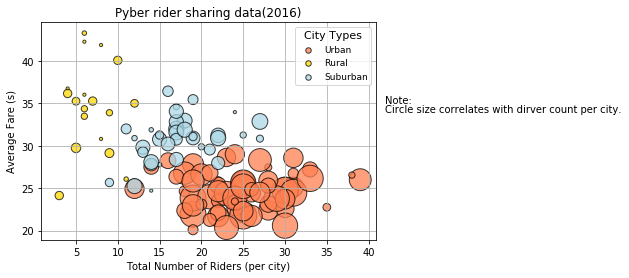

In [44]:
# Build the scatter plots for each city types
urban = plt.scatter(x_axis_urban, y_axis_urban, marker="o", 
                    color="coral",s=s_urban,edgecolors="black",alpha=0.75,label='Urban')
rural = plt.scatter(x_axis_rural, y_axis_rural, marker="o", 
                    color="gold",s=s_rural,edgecolors="black",alpha=0.75,label='Rural')
suburban = plt.scatter(x_axis_suburban, y_axis_suburban, marker="o", 
                       color="lightblue",s=s_suburban,edgecolors="black",alpha=0.75,label='Suburban')
# Incorporate the other graph properties
plt.xlabel('Total Number of Riders (per city)')
plt.ylabel('Average Fare (s)')
plt.title('Pyber rider sharing data(2016)')
plt.grid(True)
# Create a legend
lg = plt.legend(scatterpoints=1,frameon=True, title='City Types',fontsize = (9))
title = lg.get_title()
title.set_fontsize(11)
lg.legendHandles[0]._sizes=[30]
lg.legendHandles[1]._sizes=[30]
lg.legendHandles[2]._sizes=[30]

# Incorporate a text label regarding circle size
plt.text(42,35,'Note:')
plt.text(42,34,'Circle size correlates with dirver count per city.')

# Save Figure
plt.savefig('pyber_scatterplot')

In [6]:
# Show Figure
plt.show()


<Figure size 432x288 with 0 Axes>

## Total Fares by City Type

In [7]:
fare_by_city = pd.DataFrame({'Total fare' : 
                             City_data_merged[["type","Total fare"]].copy().groupby("type")["Total fare"].sum()})
fare_by_city.head()

,Total fare
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [8]:
# Calculate Type Percents
fare_by_city["percentage fare by type"] = 100 * (fare_by_city['Total fare'] / fare_by_city['Total fare'].sum())

In [9]:
# reset index to move type to column from index
fare_by_city = fare_by_city.reset_index()

[Text(0.5,1,'% of total fares by city type')]

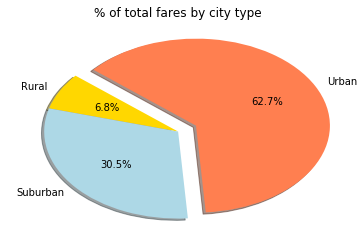

In [10]:
# Build Pie Chart
color = [ 'gold', 'lightblue', 'coral']
explode = [0,0,.15]
fig1, ax1 = plt.subplots()
ax1.pie(fare_by_city['percentage fare by type'], labels=fare_by_city['type'],colors = color,
         explode=explode, autopct="%1.1f%%", shadow=True, startangle=140);
ax1.set(title='% of total fares by city type')
# plt.axis("equal")

In [11]:
# Save Figure
fig1.savefig('percent_fare_by_city')

In [12]:
# Show Figure
plt.show()

## Total Rides by City Type

In [13]:
# Calculate Ride Percents
rides_by_city = pd.DataFrame({'Total Rides' : 
                             City_data_merged[["type","Number of Rides"]].copy().groupby("type")["Number of Rides"].sum()})
rides_by_city["percentage rides by type"] = 100 * (rides_by_city['Total Rides'] / rides_by_city['Total Rides'].sum())
rides_by_city.head()


,Total Rides,percentage rides by type
type,,
Rural,125,5.263158
Suburban,625,26.315789
Urban,1625,68.421053


In [14]:
# reset index to move type to column from index
rides_by_city = rides_by_city.reset_index()

[Text(0.5,1,'% of total rides by city type')]

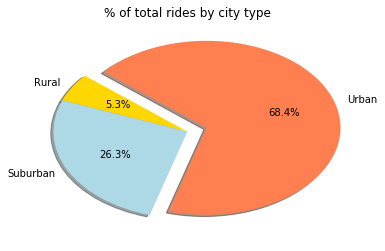

In [15]:
# Build Pie Chart
fig2, ax2 = plt.subplots()
ax2.pie(rides_by_city['percentage rides by type'], labels=rides_by_city['type'],colors = color,
         explode=explode, autopct="%1.1f%%", shadow=True, startangle=140);
ax2.set(title='% of total rides by city type')


In [16]:
# Save Figure
fig2.savefig('percent_rides_by_city')

In [17]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [18]:
# Calculate Driver Percents
drivers_by_city = pd.DataFrame({'Total drivers' : 
                             City_data_merged[["type","driver_count"]].copy().groupby("type")["driver_count"].sum()})
drivers_by_city["percentage drivers by type"] = 100 * (drivers_by_city['Total drivers'] / drivers_by_city['Total drivers'].sum())

drivers_by_city.head()

,Total drivers,percentage drivers by type
type,,
Rural,78,2.623613
Suburban,490,16.481668
Urban,2405,80.894719


In [19]:
# reset index to move type to column from index
drivers_by_city = drivers_by_city.reset_index()

[Text(0.5,1,'% of total drivers by city type')]

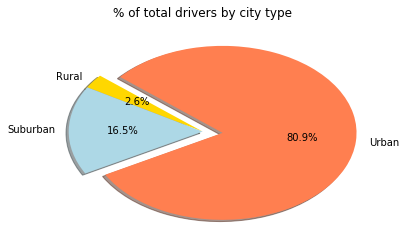

In [20]:
# Build Pie Chart
fig3, ax3 = plt.subplots()
ax3.pie(drivers_by_city['percentage drivers by type'], labels=drivers_by_city['type'],colors = color,
         explode=explode, autopct="%1.1f%%", shadow=True, startangle=140);
ax3.set(title='% of total drivers by city type')

In [21]:
# Save Figure
fig3.savefig('percent_drivers_by_city')

In [22]:
# Show Figure
plt.show()